# Kernel principal component analysis
Nonlinear mappings

In [31]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from numpy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.linalg.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i]
                            for i in range(1, n_components + 1)))

    return X_pc

In [39]:
def plot_data(X,y, plotType="normal"):
    fig, ax = plt.subplots()
    ax.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
    if plotType == "normal":
        ax.set_title('Original Data')
        ax.set_xlabel('Axis 1')
        ax.set_ylabel('Axis 2')
    elif plotType == "PCA":
        ax.set_title('Standard PCA')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
    elif plotType == "KPCA":
        ax.set_title('Kernel PCA')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
    plt.tight_layout()
    plt.show()

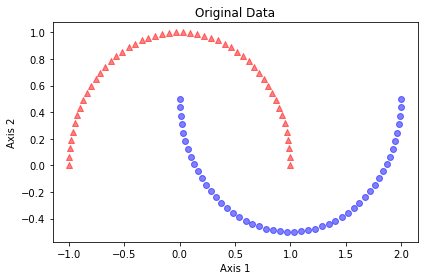

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)
plot_data(X,y) 

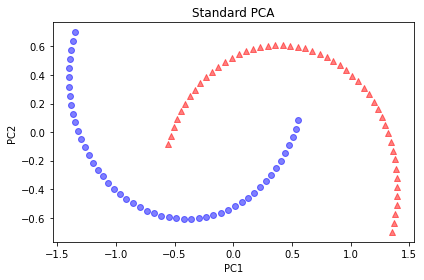

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plot_data(X_spca,y,"PCA") 

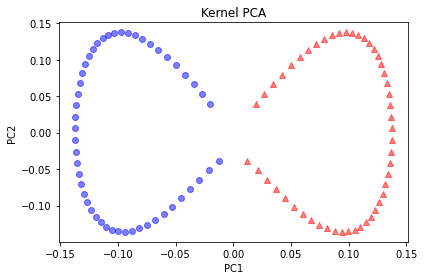

In [43]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

plot_data(X_kpca,y,"KPCA") 

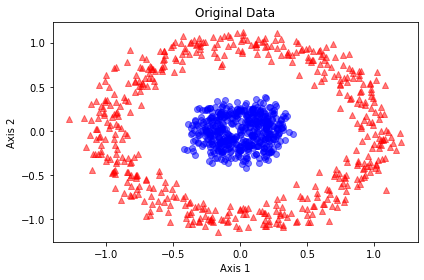

In [44]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plot_data(X,y) 

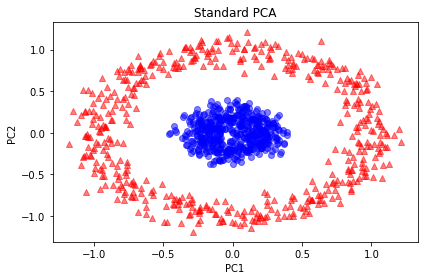

In [45]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)


plot_data(X_spca,y,"PCA") 

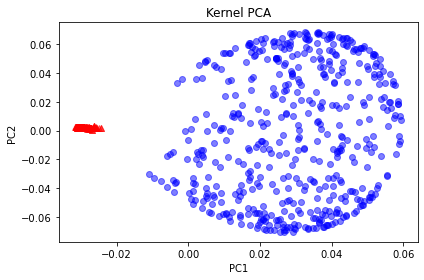

In [47]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

plot_data(X_kpca,y,"KPCA") 

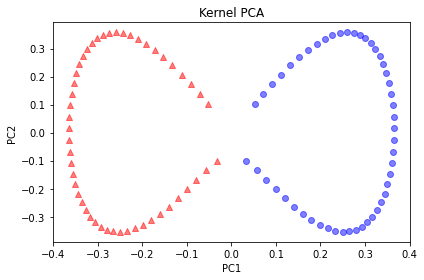

In [49]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plot_data(X_skernpca,y,"KPCA") 